In [3]:
import scipy.stats as stats
import math

# Given data
sample_mean = 42  # sample mean (x̄)
population_mean = 46  # hypothesized population mean (μ₀)
sample_std = 11.9  # sample standard deviation (s)
sample_size = 12  # sample size (n)
alpha = 0.05  # significance level

# Calculate the t-statistic
t_stat = (sample_mean - population_mean) / (sample_std / math.sqrt(sample_size))

# Degrees of freedom
df = sample_size - 1

# Find the critical t-value for a one-tailed test at the given significance level
t_critical = stats.t.ppf(1 - alpha, df)

# Compare the t-statistic with the critical value
if t_stat < t_critical:
    result = "Reject the null hypothesis"
else:
    result = "Fail to reject the null hypothesis"

# Output the results
print(f"Calculated t-statistic: {t_stat:.3f}")
print(f"Critical t-value: {t_critical:.3f}")
print(result)


Calculated t-statistic: -1.164
Critical t-value: 1.796
Reject the null hypothesis


In [10]:
# Area = stats.t.cdf(tcalc,11)
pvalue =stats.t.cdf(abs(t_stat),11)
pvalue

0.8655535872410081

In [14]:
import scipy.stats as stats

# Given data
observed = [14, 18, 32, 20, 16]
expected = [20, 20, 20, 20, 20]  # uniform distribution

# Perform the Chi-square goodness of fit test
chi2_stat, p_value = stats.chisquare(observed, expected)

# Degrees of freedom
df = len(observed) - 1

# Significance level
alpha = 0.05

# Output the results
print(f"Chi-square statistic: {chi2_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: The distribution is not uniform.")
else:
    print("Fail to reject the null hypothesis: The distribution is uniform.")


Chi-square statistic: 10.000
P-value: 0.040
Reject the null hypothesis: The distribution is not uniform.


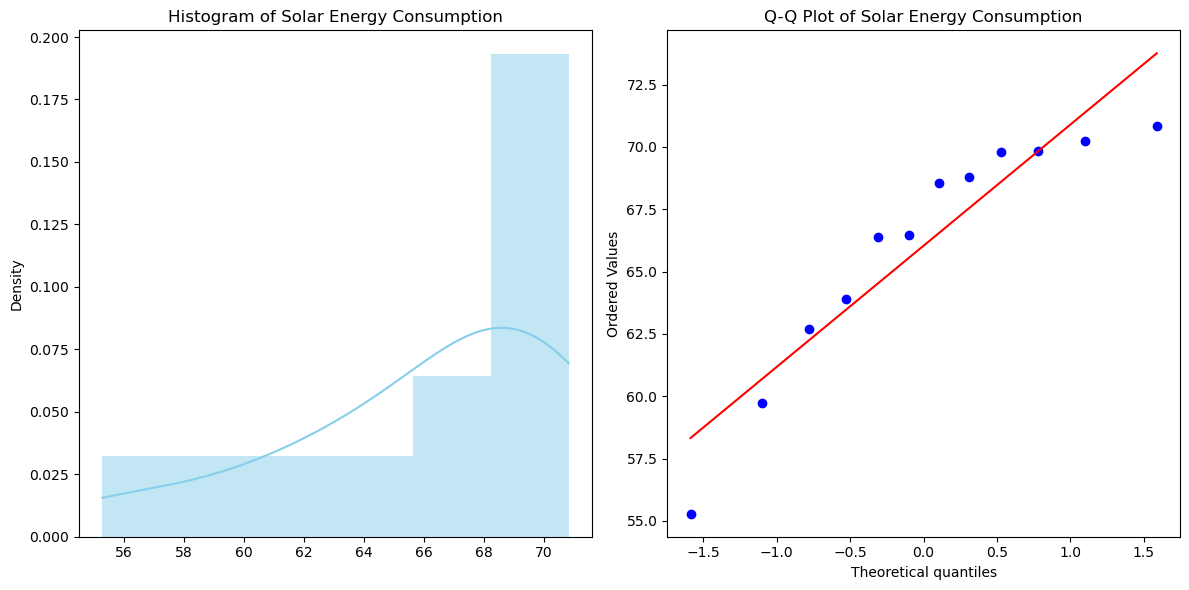

Shapiro-Wilk Test Statistic: 0.8728
Shapiro-Wilk p-value: 0.0709
Sample Mean: 66.0403
Sample Standard Deviation: 4.8124
95% Confidence Interval: (62.9827, 69.0980)


In [18]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Given data: Solar energy consumption (in trillion BTU)
solar_energy = np.array([55.291, 59.718, 62.688, 63.886, 66.458, 68.548, 
                         69.857, 70.833, 70.237, 69.787, 68.793, 66.388])

# Step 1: Check the assumption of normality

# 1.1 Visual inspection: Histogram and Q-Q plot
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(solar_energy, kde=True, bins=6, color="skyblue", stat="density", linewidth=0)
plt.title("Histogram of Solar Energy Consumption")

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(solar_energy, dist="norm", plot=plt)
plt.title("Q-Q Plot of Solar Energy Consumption")

plt.tight_layout()
plt.show()

# 1.2 Shapiro-Wilk test for normality
shapiro_test_stat, shapiro_p_value = stats.shapiro(solar_energy)
print(f"Shapiro-Wilk Test Statistic: {shapiro_test_stat:.4f}")
print(f"Shapiro-Wilk p-value: {shapiro_p_value:.4f}")

# Step 2: Calculate the 95% Confidence Interval for the mean

# Calculate the sample mean, standard deviation, and sample size
sample_mean = np.mean(solar_energy)
sample_std = np.std(solar_energy, ddof=1)  # sample standard deviation (ddof=1 for unbiased estimate)
sample_size = len(solar_energy)

# Degrees of freedom
df = sample_size - 1

# t-critical value for 95% confidence
t_critical = stats.t.ppf(1 - 0.025, df)  # 1 - alpha/2 for two-tailed 95% CI

# Margin of error
margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))

# Confidence interval
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"Sample Mean: {sample_mean:.4f}")
print(f"Sample Standard Deviation: {sample_std:.4f}")
print(f"95% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")


In [27]:
df= pd.read_csv('data_set.csv')

<IPython.core.display.Javascript object>

In [29]:
# Step 1: Group the data by Outlet_Location_Type
tier_groups = [df[df['Outlet_Location_Type'] == tier]['Item_Outlet_Sales'] for tier in df['Outlet_Location_Type'].unique()]

# Step 2: Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*tier_groups)

# Display the test statistic and p-value
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 3: Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Item_Outlet_Sales across the different Outlet_Location_Types.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Item_Outlet_Sales across the different Outlet_Location_Types.")


F-statistic: 12.9514
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in Item_Outlet_Sales across the different Outlet_Location_Types.


In [34]:
# Step 1: Calculate sample mean and standard deviation of Item_Outlet_Sales
sample_mean = df['Item_Outlet_Sales'].mean()
sample_std = df['Item_Outlet_Sales'].std()
n = len(df)

# Step 2: Hypothesized population mean (shopkeeper's claim)
claimed_mean = 2280

# Step 3: Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(df['Item_Outlet_Sales'], claimed_mean)

# Since we are testing whether the average is **less than** 2280, we need a one-tailed test
# For one-tailed, we take half of the p-value obtained from the two-tailed test
one_tailed_p_value = p_value / 2

# Step 4: Output the test statistic and p-value
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value (one-tailed): {one_tailed_p_value:.4f}")

# Step 5: Interpret the result at 95% confidence level (α = 0.05)
alpha = 0.05
if one_tailed_p_value < alpha:
    print("Reject the null hypothesis: The average Item_Outlet_Sales is less than $2280.")
else:
    print("Fail to reject the null hypothesis: The average Item_Outlet_Sales is not less than $2280.")

Sample Mean: 2272.04
Sample Standard Deviation: 1497.96
T-statistic: -0.3625
P-value (one-tailed): 0.3585
Fail to reject the null hypothesis: The average Item_Outlet_Sales is not less than $2280.


In [38]:
# Step 1: Calculate sample mean and standard deviation of Item_Outlet_Sales
sample_mean = df['Item_Outlet_Sales'].mean()
sample_std = df['Item_Outlet_Sales'].std()
n = len(df)

# Step 2: Hypothesized population mean (shopkeeper's claim)
claimed_mean = 2280

# Step 3: Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(df['Item_Outlet_Sales'], claimed_mean)

# Since we are testing whether the average is **less than** 2280, we need a one-tailed test
# For one-tailed, we take half of the p-value obtained from the two-tailed test
one_tailed_p_value = p_value / 2

# Step 4: Output the test statistic and p-value
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value (one-tailed): {one_tailed_p_value:.4f}")

# Step 5: Interpret the result at 95% confidence level (α = 0.05)
alpha = 0.05
if one_tailed_p_value < alpha:
    print("Reject the null hypothesis: The average Item_Outlet_Sales is less than $2280.")
else:
    print("Fail to reject the null hypothesis: The average Item_Outlet_Sales is not less than $2280.")

Sample Mean: 2272.04
Sample Standard Deviation: 1497.96
T-statistic: -0.3625
P-value (one-tailed): 0.3585
Fail to reject the null hypothesis: The average Item_Outlet_Sales is not less than $2280.
